In [12]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

print(df.info())



Saving IMDb Movies India.csv to IMDb Movies India (6).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


 good average rating by Year: 1973.0


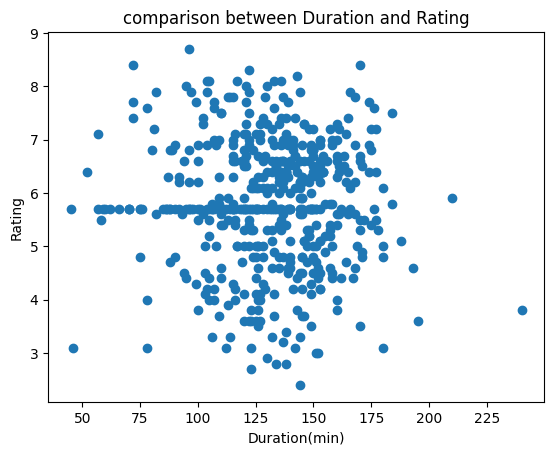

Top ten movies:
                        Name  Rating
967    An Insignificant Man     8.7
963     An Engineered Dream     8.4
75                 3 Idiots     8.4
981                   Anand     8.3
903               Amar Prem     8.2
43                     1971     8.1
173             A Wednesday     8.1
944           Ammaa Ki Boli     8.1
392                  Aandhi     8.1
137  A Billion Colour Story     8.1
top movies per year:
                                Name    Rating
580                      Abul Hasan  5.697509
988                       Anangsena  5.697509
838  Ali Baba and the Forty Thieves  5.697509
845         Alibaba Aur Chalis Chor  3.400000
851                      Alif Laila  7.200000
..                              ...       ...
2                       #Homecoming  5.697509
177                Aa Bhi Ja O Piya  5.697509
155            A Mistake (Ek Galti)  5.697509
161                  A Separate Sky  5.697509
640                       Adipurush  5.697509

[711 rows x 

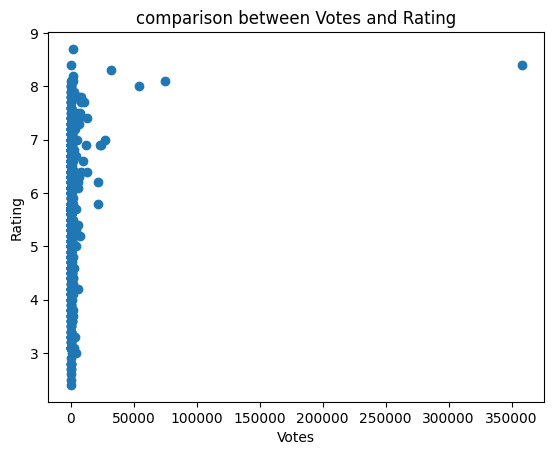

R^2 score: -0.6507097633124446
RMSE: 1.2384083328455862
predicted rating: 5.341094571147647


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('IMDb Movies India.csv',encoding='ISO-8859-1',nrows=1000)

df['Year']=df['Year'].str.extract(r'(\d{4})').astype(float)
df['Duration']=df['Duration'].str.replace('min','',regex=False).astype(float)
df['Genre']=df['Genre'].fillna('Unknown')
df['Rating']=df['Rating'].fillna(df['Rating'].mean())
def clean_votes(v):
    if pd.isna(v):
        return 0
    v = str(v).replace(',', '').replace('$','').strip()
    if 'M' in v:
        return float(v.replace('M','')) * 1_000_000
    elif 'K' in v:
        return float(v.replace('K','')) * 1_000
    try:
        return float(v)
    except:
        return 0

df['Votes'] = df['Votes'].apply(clean_votes)

df['Director']=df['Director'].fillna('Unknown')
df['Actor 1']=df['Actor 1'].fillna("Unknown")
df['Actor 2']=df['Actor 2'].fillna('Unknown')
df['Actor 3']=df['Actor 3'].fillna('Unknown')

good_year=df.groupby('Year')['Rating'].mean().idxmax()
print(" good average rating by Year:",good_year)

if 'Duration' in df.columns:
  plt.scatter(df['Duration'],df['Rating'])
  plt.xlabel('Duration(min)')
  plt.ylabel('Rating')
  plt.title('comparison between Duration and Rating')
  plt.show()

top_movies=df.sort_values(by='Rating',ascending=False).head(10)
print("Top ten movies:\n",top_movies[['Name','Rating']])
top_movies_per_year=df.groupby('Year',group_keys=False).apply(lambda x:x[['Name','Rating']].sort_values('Rating',ascending=False).head(10),include_groups=False)
print("top movies per year:\n",top_movies_per_year[['Name','Rating']])

trending_movies=df[df['Rating']>=8]
movies_per_year=trending_movies.groupby('Year').size()
print(" trending movies per year:\n",movies_per_year)

if 'Votes' in df.columns:
  plt.scatter(df['Votes'],df['Rating'])
  plt.xlabel('Votes')
  plt.ylabel('Rating')
  plt.title('comparison between Votes and Rating')
  plt.show()

top_director=df['Director'].value_counts().nlargest(50).index
df['Director']=df['Director'].apply(lambda x:x if x in top_director else 'Other')

top_actor=df['Actor 1'].value_counts().nlargest(50).index
df['Actor 1']=df['Actor 1'].apply(lambda x:x if x in top_actor else 'Other')
x=df[['Genre','Director','Actor 1']]
y=df['Rating']

encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
x_encoded = encoder.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("R^2 score:",r2_score(y_test,y_pred))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

new_movie=pd.DataFrame([['Action','some director','some actor']],columns=['Genre','Director','Actor 1'])
new_movie_encoded=encoder.transform(new_movie)
predicted_rating=model.predict(new_movie_encoded)
print("predicted rating:",predicted_rating[0])



